# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import torch
import torchtext
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# load data from csv file
fields = ['news_article', 'news_category']

train_data = pd.read_csv('/content/inshort_news_data-train.csv', header=0, encoding='ISO-8859-1', usecols=fields, skip_blank_lines=True)
val_data = pd.read_csv('/content/inshort_news_data-val.csv', header=0, encoding='ISO-8859-1', usecols=fields, skip_blank_lines=True)
test_data = pd.read_csv('/content/inshort_news_data-test.csv', header=0, encoding='ISO-8859-1', usecols=fields, skip_blank_lines=True)

In [ ]:
print('Num training articles: ', len(train_data))
print('Num validation articles: ', len(val_data))
print('Num testing articles: ', len(test_data))

Num training articles:  6380
Num validation articles:  1560
Num testing articles:  1742


In [ ]:
print(train_data)

                                           news_article news_category
0     DeepMind's AI system 'AlphaFold' has been reco...    technology
1     Microsoft Teams will stop working on Internet ...    technology
2     China, in response to reports of US adding Chi...    technology
3     The global smartphone sales in the third quart...    technology
4     The European Union (EU) is hoping that US Pres...    technology
...                                                 ...           ...
6375  China will open the world's largest radio tele...       science
6376  China's Chang'e-5 probe successfully landed in...       science
6377  "Forever chemicals" used in water-repellent ou...       science
6378  The members of the US Space Force will be call...       science
6379  Coral populations from Australia's first "Cora...       science

[6380 rows x 2 columns]


In [ ]:
# Creating training and testing data
X_train = train_data['news_article']
Y_train = train_data['news_category']

X_test = test_data['news_article']
Y_test = test_data['news_category']


X_val = val_data['news_article']
Y_val = val_data['news_category']

print (X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(6380,) (6380,) (1560,) (1560,) (1742,) (1742,)


In [ ]:
print(X_train)
print(Y_train)

0       DeepMind's AI system 'AlphaFold' has been reco...
1       Microsoft Teams will stop working on Internet ...
2       China, in response to reports of US adding Chi...
3       The global smartphone sales in the third quart...
4       The European Union (EU) is hoping that US Pres...
                              ...                        
6375    China will open the world's largest radio tele...
6376    China's Chang'e-5 probe successfully landed in...
6377    "Forever chemicals" used in water-repellent ou...
6378    The members of the US Space Force will be call...
6379    Coral populations from Australia's first "Cora...
Name: news_article, Length: 6380, dtype: object
0       technology
1       technology
2       technology
3       technology
4       technology
           ...    
6375       science
6376       science
6377       science
6378       science
6379       science
Name: news_category, Length: 6380, dtype: object


# Prepare X_train and Y_train for package model

In [ ]:
Y_train = pd.get_dummies(Y_train).to_numpy()
Y_val = pd.get_dummies(Y_val).to_numpy()
Y_test = pd.get_dummies(Y_test).to_numpy()

print(Y_train)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y_train, y_val, y_test = [],[],[]
for i in range(Y_train.shape[0]):
  for j in range(7):
    if Y_train[i][j]==1:
      y_train.append(j)

y_train = np.array(y_train)

for i in range(Y_val.shape[0]):
  for j in range(7):
    if Y_val[i][j]==1:
      y_val.append(j)

y_val = np.array(y_val)


for i in range(Y_test.shape[0]):
  for j in range(7):
    if Y_test[i][j]==1:
      y_test.append(j)

y_test = np.array(y_test)

print(y_train.shape, y_val.shape, y_test.shape)

(6380,) (1560,) (1742,)


In [ ]:
X = X_train
y = y_train

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
print(y_train.shape)

(5104,)


In [ ]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

X_test_counts = count_vect.fit_transform(X_test)
X_test_counts.shape

(1276, 9361)

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
X_test_tfidf.shape

(1276, 9361)

# KNN, NB, Random Forest model training

## NB model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
predicted = clf.predict(X_train_tfidf)
np.mean(predicted == y_train)

0.9422021943573667

## random forest model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#rondom forest net
rf_net = RandomForestClassifier(n_estimators=100)
#apply data to model
rf_net.fit(X_train_tfidf, y_train)

In [ ]:
predicted = rf_net.predict(X_train_tfidf)
np.mean(predicted == y_train)

0.9745297805642633

## KNN model

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# apply data to model 
knn.fit(X_train_tfidf,y_train)

In [ ]:
predicted = knn.predict(X_train_tfidf)
np.mean(predicted == y_train)

0.9531739811912225

# ANN baseline model

## Data loader

In [124]:
import numpy as np
import time
import torch
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [102]:
# load data from csv file
fields = ['news_article', 'news_category']

train_data = pd.read_csv('/content/inshort_news_data-train.csv', header=0, encoding='ISO-8859-1', usecols=fields, skip_blank_lines=True)
val_data = pd.read_csv('/content/inshort_news_data-val.csv', header=0, encoding='ISO-8859-1', usecols=fields, skip_blank_lines=True)
test_data = pd.read_csv('/content/inshort_news_data-test.csv', header=0, encoding='ISO-8859-1', usecols=fields, skip_blank_lines=True)

In [103]:
# Creating training and testing data
X_train = train_data['news_article']
Y_train = train_data['news_category']
"""
Y_train = np.zeros((X_train.shape[0],1))
for i in range((X_train.shape[0])):
  for j in range(7):
    if (train[j+1][i]==1):
      Y_train[i]=j
"""
X_test = test_data['news_article']
Y_test = test_data['news_category']
"""
Y_test = np.zeros((X_test.shape[0],1))
for i in range((X_test.shape[0])):
  for j in range(7):
    if (test[j+1][i]==1):
      Y_test[i]=j
"""
X_val = val_data['news_article']
Y_val = val_data['news_category']

print (X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(6380,) (6380,) (1560,) (1560,) (1742,) (1742,)


In [104]:
for i in range(X_train.shape[0]):
  X_train[i] = X_train[i].split()

for j in range(X_val.shape[0]):
  X_val[j] = X_val[j].split()

for k in range(X_test.shape[0]):
  X_test[k] = X_test[k].split()
    
Y_train = pd.get_dummies(Y_train).to_numpy()
Y_val = pd.get_dummies(Y_val).to_numpy()
Y_test = pd.get_dummies(Y_test).to_numpy()

In [105]:
# stopwords to eliminate useless words
stopwords = []
stop = open('/content/stopwords.txt', encoding="utf-8")
for line in stop:
  stopwords.append(line.strip())
stop.close()

In [106]:
# utilize Glove6B for embedding
glove = torchtext.vocab.GloVe(name='6B', dim=50)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.39MB/s]                           
100%|█████████▉| 399999/400000 [00:12<00:00, 30830.57it/s]


In [107]:
# Filling the embedding matrix
embedding_matrix_train = np.zeros((X_train.shape[0], 61, 50))
embedding_matrix_val = np.zeros((X_val.shape[0], 61, 50))
embedding_matrix_test = np.zeros((X_test.shape[0], 61, 50))

for i in range(X_train.shape[0]):
  for j in range(len(X_train[i])):
    if not (X_train[i][j].lower() in stopwords):
      embedding_matrix_train[i][j] = glove[X_train[i][j].lower()]

for i in range(X_val.shape[0]):
  for j in range(len(X_val[i])):
    if not (X_val[i][j].lower() in stopwords):
      embedding_matrix_val[i][j] = glove[X_val[i][j].lower()]

for i in range(X_test.shape[0]):
  for j in range(len(X_test[i])):
    if not (X_test[i][j].lower() in stopwords):
      embedding_matrix_test[i][j] = glove[X_test[i][j].lower()] 

In [108]:
X_train_t = torch.from_numpy(embedding_matrix_train).to(torch.float32)
Y_train_t = torch.from_numpy(Y_train).to(torch.float32)
X_val_t = torch.from_numpy(embedding_matrix_val).to(torch.float32)
Y_val_t = torch.from_numpy(Y_val).to(torch.float32)
X_test_t = torch.from_numpy(embedding_matrix_test).to(torch.float32)
Y_test_t = torch.from_numpy(Y_test).to(torch.float32)

In [109]:
train_dataset = TensorDataset(X_train_t, Y_train_t)
val_dataset = TensorDataset(X_val_t, Y_val_t)
test_dataset = TensorDataset(X_test_t, Y_test_t)

train_dataloader = DataLoader(train_dataset, batch_size=128)
val_dataloader = DataLoader(val_dataset, batch_size=128)
test_dataloader = DataLoader(test_dataset, batch_size=128)

In [123]:
X_train_t.shape

torch.Size([6380, 61, 50])

## ANN Class

In [126]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(50*61, 30)
        # layer 2 = nn.Linear (30, 15)
        self.layer2 = nn.Linear(30, 7)
    def forward(self, img):
        flattened = img.view(-1, 50*61)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

## Training

In [127]:
import matplotlib.pyplot as plt # for plotting



def train_net(net, batch_size, learning_rate, num_epochs, momentum, train_loader, val_loader):
    assert num_epochs > 0, "num_epochs must be an integer that is greater than 0"
    assert learning_rate > 0, "learning_rate must be greater than 0"
    torch.manual_seed(1000)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr=learning_rate,
                                 weight_decay=1e-5)
    epochs, train_losses, train_acc, val_losses, val_acc = [], [], [], [], []
    start_time = time.time()
    for epoch in range(num_epochs):
        epochs.append(epoch)
        total, correct = 0, 0
        total_loss = 0
        for articles, labels in train_loader:
            out = net(articles)
            loss = criterion(out, labels)
            total_loss = total_loss + loss.item() * articles.shape[0]
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            pred = torch.squeeze(out.max(1, keepdim=True)[1], 1)
            correct = correct + pred.eq(torch.argmax(labels, dim=1)).sum().item()
            total = total + articles.shape[0]
        train_acc.append(correct/total)
        train_losses.append(total_loss/total)

        val_correct = 0
        val_total_loss = 0
        val_total = 0
        for val_articles, val_labels in val_loader:
            # if use_cuda and torch.cuda.is_available():
                # val_imgs = val_imgs.cuda()
                # val_labels = val_labels.cuda()
            val_out = net(val_articles)
            # print(val_imgs)
            val_pred = torch.squeeze(val_out.max(1, keepdim=True)[1], 1)
            val_correct = val_correct + val_pred.eq(torch.argmax(val_labels, dim=1)).sum().item()
            val_total = val_total + val_articles.shape[0]
            val_total_loss = val_total_loss + (criterion(val_out, val_labels)).item() * val_articles.shape[0]
        val_losses.append(val_total_loss/val_total) # Append the average loss
        val_acc.append(val_correct/val_total)

        print("Epoch {0}:\ntraining accuracy: {1}\ttraining loss: {2}\tvalidation accuracy: {3}\tvalidation loss:{4}".format(epoch, train_acc[epoch], train_losses[epoch], val_acc[epoch], val_losses[epoch]))
        print("Correct number of outputs in validation: {0}\tTotal number of outputs in validation: {1}\tTotal validation loss {2}".format(val_correct, val_total, val_total_loss))
    end_time = time.time()
    print("Total time:  % 6.2f s  Time per Epoch: % 6.2f s " % (
    (end_time - start_time), ((end_time - start_time) / num_epochs)))

    # plotting
    plt.title("Training Loss Curve")
    plt.plot(epochs, train_losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Train Loss")
    plt.show()

    plt.title("Training Accuracy Curve")
    plt.plot(epochs, train_acc, label="Training")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.show()


    plt.title("Validation Loss Curve")
    plt.plot(epochs, val_losses, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Train Loss")
    plt.show()

    plt.title("Validation Accuracy Curve")
    plt.plot(epochs, val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.show()

Epoch 0:
training accuracy: 0.7738244514106583	training loss: 0.0650430633496715	validation accuracy: 0.7833333333333333	validation loss:0.06070222923388848
Correct number of outputs in validation: 1222	Total number of outputs in validation: 1560	Total validation loss 94.69547760486603
Epoch 1:
training accuracy: 0.9556426332288401	training loss: 0.026312287115611628	validation accuracy: 0.7666666666666667	validation loss:0.06052105331268066
Correct number of outputs in validation: 1196	Total number of outputs in validation: 1560	Total validation loss 94.41284316778183
Epoch 2:
training accuracy: 0.9658307210031348	training loss: 0.016280164177818544	validation accuracy: 0.7564102564102564	validation loss:0.06203863276885106
Correct number of outputs in validation: 1180	Total number of outputs in validation: 1560	Total validation loss 96.78026711940765
Epoch 3:
training accuracy: 0.9672413793103448	training loss: 0.012273740084100293	validation accuracy: 0.7596153846153846	validation l

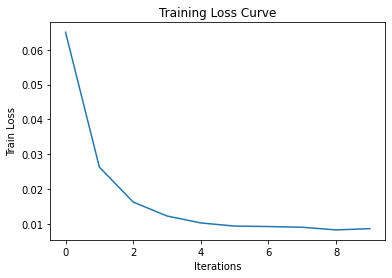

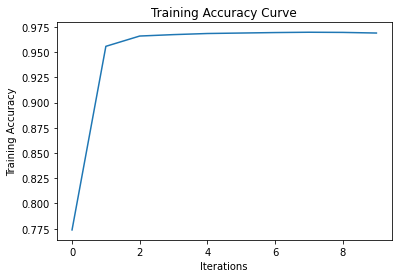

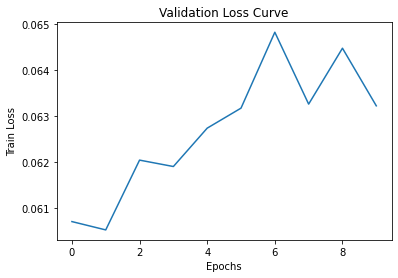

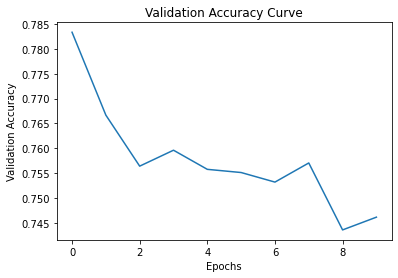

In [128]:
net = ANN()

train_net(net, batch_size=128, learning_rate=0.001, num_epochs=10, momentum=0.9, train_loader=train_dataloader, val_loader=val_dataloader)

## Testing

In [129]:
def test_model(net, data_loader, criterion):
    correct = 0
    total_loss = 0
    total = 0
    for articles, labels in data_loader:
        out = net(articles)
        pred = torch.squeeze(out.max(1, keepdim=True)[1], 1)
        correct = correct + pred.eq(torch.argmax(labels, dim=1)).sum().item()
        total = total + articles.shape[0]
        total_loss = total_loss + (criterion(out, labels)).item() * articles.shape[0]
    return correct, total, correct / total, total_loss / total

In [131]:
test_result = test_model(net, test_dataloader, nn.MSELoss())
print("Correct: {0}\tTotal: {1}\tAccuracy: {2}\tLoss: {3}".format(test_result[0], test_result[1], test_result[2], test_result[3]))

Correct: 1267	Total: 1742	Accuracy: 0.7273249138920781	Loss: 0.07292438485797594
